In [73]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("airbnb_cartagena.sqlite")
df_attributes = pd.read_sql_query("SELECT * FROM Attributes", conn)
df_time_series = pd.read_sql_query("SELECT * FROM TimeSeriesInterpolated", conn)
conn.close()
print(df_time_series.columns)
df_attributes=df_attributes[['Name', 'Host', 'Base fee', 'Cleaning fee', 'URL', 'ID', 'latitude',
       'longitude', 'Property type', 'Person capacity', 'accuracy_rating',
       'checking_rating', 'cleanliness_rating', 'communication_rating',
       'location_rating', 'value_rating', 'satisfaction_rating', 'Reviews',
       'Bedrooms', 'Beds', 'Baths', 'City skyline view', 'Beach view',
       'Sea/Lake view', 'Hot water', 'Jacuzzi', 'Shared pool', 'Shared gym',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Carport', 'Dedicated workspace', 'AC', 'Heating', 'TV',
       'Cable TV', 'Wifi', 'Laundry service', 'Kitchen', 'Dining table',
       'Microwave', 'Dishes and silverware', 'Refrigerator', 'Stove',
        'Washer', 'Pets allowed',
     'Crib', 
        'Security cameras', 'Lock on door', 'Keypad']]
df_attributes["Base fee"]=df_attributes["Base fee"].map(lambda x: float(x[1:]))
df_attributes["Base fee"]=df_attributes["Base fee"].map(lambda x:  x//10*10+5)
df_attributes.head()


Index(['Name', 'ID', 'Base fee', 'Cleaning fee', 'latitude', 'longitude',
       'Property type', 'Noches 05', 'Noches 06', 'Noches 07', '26/5/2025',
       '27/5/2025', '28/5/2025', '29/5/2025', '30/5/2025', '31/5/2025',
       '1/6/2025', '2/6/2025', '3/6/2025', '4/6/2025', '5/6/2025', '6/6/2025',
       '7/6/2025', '8/6/2025', '9/6/2025', '10/6/2025', '11/6/2025',
       '12/6/2025', '13/6/2025', '14/6/2025', '15/6/2025', '16/6/2025',
       '17/6/2025', '18/6/2025', '19/6/2025', '20/6/2025', '21/6/2025',
       '22/6/2025', '23/6/2025', '24/6/2025', '25/6/2025', '26/6/2025',
       '27/6/2025', '28/6/2025', '29/6/2025', '30/6/2025', '1/7/2025',
       '2/7/2025', '3/7/2025', '4/7/2025', '5/7/2025', '6/7/2025', '7/7/2025',
       '8/7/2025', '9/7/2025', '10/7/2025', '11/7/2025', '12/7/2025',
       '13/7/2025', '14/7/2025', '15/7/2025', '16/7/2025', '17/7/2025',
       '18/7/2025', '19/7/2025', '20/7/2025', '21/7/2025', '22/7/2025',
       '23/7/2025', '24/7/2025', '25/7/2025', '26/

,Name,Host,Base fee,Cleaning fee,URL,ID,latitude,longitude,Property type,Person capacity,...,Microwave,Dishes and silverware,Refrigerator,Stove,Washer,Pets allowed,Crib,Security cameras,Lock on door,Keypad
0,14th Floor/Jacuzzi balcony/SeaViews/Parking/King,Alejandra,95.0,$38.00,https://www.airbnb.ca/rooms/128289097755583918...,1282890977555839180,10.456400,-75.505410,Entire serviced apartment,5.0,...,0,1,1,1,1,1,0,1,0,0
1,2 BR Modern APT jacuzzi / Rooftop near to beach,Alberto,105.0,$35.00,https://www.airbnb.com/rooms/12559080218421979...,1255908021842197930,10.456549,-75.505265,Entire rental unit,6.0,...,0,0,0,0,1,1,0,0,0,0
2,Piso 12/ Jacuzzi/ Vistas/ 1BR/Parqueadero/Pisc...,Alejandra,65.0,$36.00,https://www.airbnb.mx/rooms/136437655186096193...,1364376551860961934,10.456523,-75.505361,Entire serviced apartment,4.0,...,1,1,1,0,1,1,1,1,0,0
3,Piso 14/ Jacuzzi/ Vistas/ 2BR/Parqueadero/Pisc...,Alejandra,85.0,$36.00,https://www.airbnb.mx/rooms/127921819131081724...,1279218191310817247,10.456398,-75.505406,Entire serviced apartment,5.0,...,1,1,1,1,1,1,0,1,0,0
4,Luxury /Jacuzzi/ Decoration/ Caribbean/ Pools/,Alejandra,85.0,$36.00,https://www.airbnb.mx/rooms/125978025681811266...,1259780256818112667,10.456398,-75.505406,Entire serviced apartment,4.0,...,1,1,1,1,1,1,0,1,0,0


In [3]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# 3. Derretir (melt) el DataFrame para convertir columnas de fecha en filas
df_melted = df_time_series.melt(
    id_vars=["ID"],  # columnas fijas (puedes ajustar)
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

ids = df_time_series["ID"].unique()[:100]

fig = make_subplots(
    rows=10, cols=10,
    subplot_titles=[f"ID: {i}" for i in ids],
    horizontal_spacing=0.01,
    vertical_spacing=0.03
)

for idx, id_val in enumerate(ids):
    sub = df_melted[df_melted["ID"] == id_val].sort_values("Date")
    
    x = sub["Value"].iloc[:-1].values
    y = sub["Value"].iloc[1:].values
    
    row = idx // 10 + 1
    col = idx % 10 + 1
    
    trace = go.Scatter(
        x=x,
        y=y,
        mode="lines+markers", 
        marker=dict(size=4),
        line=dict(width=1),
        showlegend=False
    )
    
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=2000,
    width=2000,
    title_text="Value[t+1] vs Value[t] por ID",
    margin=dict(t=40),
)

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=10) 

fig.show()



C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\737914486.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])


In [ ]:
df_melted.head()

,ID,Date,Value
0,1282890977555839180,2025-05-26,113.17
1,1255908021842197930,2025-05-26,114.50
2,1364376551860961934,2025-05-26,111.00
3,1279218191310817247,2025-05-26,117.50
4,1259780256818112667,2025-05-26,112.00


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\3664554366.py:28: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Selected_columns: Index(['Person capacity', 'Reviews', 'Bedrooms', 'Beds', 'Baths',
       'City skyline view', 'Beach view', 'Sea/Lake view', 'Hot water',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Dedicated workspace', 'Heating', 'Cable TV',
       'Laundry service', 'Dining table', 'Microwave', 'Dishes and silverware',
       'Refrigerator', 'Stove', 'Pets allowed', 'Crib', 'Security cameras',
       'Lock on door'],
      dtype='object')


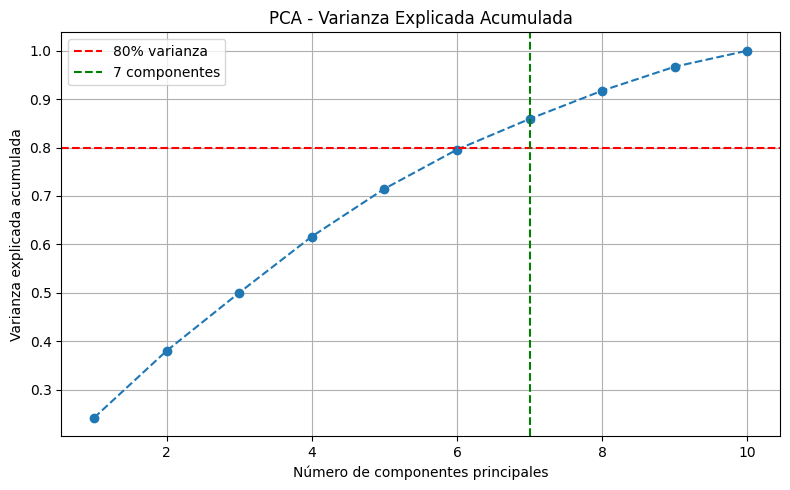

 PCA: 7 componentes conservan 85.90% de la varianza
SVD: Amenidades binarias reducidas a 5 componentes
 Matriz de distancias calculada. Espacio de puntos listo para TDA.


In [59]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt


columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# 3. Derretir (melt) el DataFrame para convertir columnas de fecha en filas
df_prices = df_time_series.melt(
    id_vars=["ID"],  # columnas fijas (puedes ajustar)
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
# ------------------------------
# 1. Selección de variables numéricas y resumen series de tiempo
# ------------------------------

# A) Variables numéricas (excepto ID)
df_num = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])

# B) Crear resumen de precios por ID
def summarize_prices(df_prices):
    df_prices["log_price"] = np.log1p(df_prices["Value"])
    summary = df_prices.groupby("ID")["log_price"].agg([
        'mean', 'std'
    ]).rename(columns={"mean": "price_mean", "std": "price_std"})

    # Tendencia: regresión lineal día vs. precio
    df_prices['day'] = (pd.to_datetime(df_prices['Date']) - pd.to_datetime(df_prices['Date']).min()).dt.days
    trends = []

    for _, group in df_prices.groupby('ID'):
        X = group['day'].values.reshape(-1, 1)
        y = np.log1p(group['Value'].values)
        if len(np.unique(X)) > 1:
            slope = LinearRegression().fit(X, y).coef_[0]
        else:
            slope = 0.0
        trends.append(slope)

    summary['price_trend'] = trends
    return summary

df_price_summary = summarize_prices(df_prices)

# Unir con atributos por ID
df_merged = df_attributes.merge(df_price_summary, left_on="ID", right_index=True)

# ------------------------------
# 2. Eliminar baja varianza y alta correlación
# ------------------------------

# Selección de numéricas y variables temporales
df_all_num = df_merged.select_dtypes(include=[np.number]).drop(columns=["ID"])

# Quitar variables de baja varianza
selector = VarianceThreshold(threshold=0.1)
X_var_filtered = selector.fit_transform(df_all_num)
selected_columns = df_all_num.columns[selector.get_support()]
print("Selected_columns:",selected_columns )

# Eliminar alta correlación (> 0.95)
df_reduced = pd.DataFrame(X_var_filtered, columns=selected_columns)
corr_matrix = df_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.5)]
df_final_num = df_reduced.drop(columns=to_drop_corr)

# ------------------------------
# 3. Escalado
# ------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final_num)

# ------------------------------
# 4. Ya aplicamos log1p al precio en el resumen → no necesario aquí
# ------------------------------

# ------------------------------
# 5. PCA (80%)
# ------------------------------

pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza')
plt.axvline(x=pca.n_components_, color='g', linestyle='--', label=f'{pca.n_components_} componentes')

plt.title('PCA - Varianza Explicada Acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f" PCA: {pca.n_components_} componentes conservan {pca.explained_variance_ratio_.sum():.2%} de la varianza")

# ------------------------------
# 6. Amenidades binarias → TruncatedSVD
# ------------------------------

binary_columns = df_attributes.columns[
    (df_attributes.dtypes == 'int64') & 
    (df_attributes.nunique() == 2) &
    (df_attributes.columns != 'ID')
]

X_binary = df_attributes[binary_columns]
svd = TruncatedSVD(n_components=5, random_state=42)
X_svd = svd.fit_transform(X_binary)

print(f"SVD: Amenidades binarias reducidas a 5 componentes")

# ------------------------------
# 7. Concatenar espacio final
# ------------------------------

# Aseguramos que IDs coincidan
ids = df_attributes["ID"].values
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=ids)
df_svd = pd.DataFrame(X_svd, columns=[f"SVD{i+1}" for i in range(X_svd.shape[1])], index=ids)

df_space = pd.concat([df_pca, df_svd], axis=1)
df_space["ID"] = df_space.index

# ------------------------------
# 8. Matriz de distancias
# ------------------------------

dist_matrix = squareform(pdist(df_space.drop(columns="ID").values, metric='euclidean'))
df_dist = pd.DataFrame(dist_matrix, index=df_space["ID"], columns=df_space["ID"])

print(" Matriz de distancias calculada. Espacio de puntos listo para TDA.")


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

color_column = "PC3" if "PC3" in df_space.columns else "PC2"

fig = px.scatter(
    df_space,
    x="PC1",
    y="PC2",
    color=color_column,
    hover_name="ID",
    title="Espacio de puntos",
    width=800,
    height=600,
)

fig.update_traces(marker=dict(size=6, opacity=0.8), selector=dict(mode='markers'))
fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    template="plotly_white",
    showlegend=False
)
fig.show()


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 

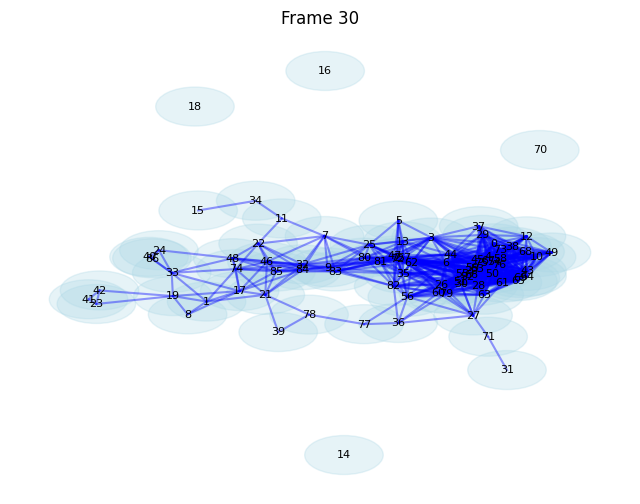

In [45]:
import os
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from PIL import Image
points = df_space[["PC1", "PC2", "ID"]].copy().reset_index(drop=True)
X = points[["PC1", "PC2"]].values
ids = points["ID"].astype(str).values

# Configuración
n_frames = 30
max_radius = 0.5  # Ajusta según escala de PC
frames = []

# Crear carpeta temporal para imágenes
os.makedirs("frames_tmp", exist_ok=True)

for frame_idx in range(n_frames):
    radius = max_radius * (frame_idx + 1) / n_frames
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    # Dibujar círculos
    for i, (x, y) in enumerate(X):
        circle = plt.Circle((x, y), radius=radius, color='lightblue', alpha=0.3)
        ax.add_patch(circle)
        ax.text(x, y, i, fontsize=8, ha='center', va='center')

    for i in range(len(X)):
        for j in range(i+1, len(X)):
            dist = np.linalg.norm(X[i] - X[j])
            if dist < 2 * radius:
                ax.plot([X[i][0], X[j][0]], [X[i][1], X[j][1]], 'b-', alpha=0.4)

    ax.set_title(f"Frame {frame_idx+1}")
    ax.axis('off')

    # Guardar imagen temporal
    filename = f"frames_tmp/frame_{frame_idx:03d}.png"
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    frames.append(Image.open(filename))
frames.append(Image.open(filename))

frames[0].save("nerves_cartagena.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)


In [74]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import pdist, squareform
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt
import umap

# ------------------------------
# 0. Identificar columnas de fecha
# ------------------------------

columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# ------------------------------
# 1. Derretir el DataFrame para convertir fechas en filas
# ------------------------------

df_prices = df_time_series.melt(
    id_vars=["ID"],
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_prices["Date"] = pd.to_datetime(df_prices["Date"])

# ------------------------------
# 2. Selección de variables numéricas y resumen series de tiempo
# ------------------------------

df_num = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])

def summarize_prices(df_prices):
    df_prices["log_price"] = np.log1p(df_prices["Value"])
    summary = df_prices.groupby("ID")["log_price"].agg([
        'mean', 'std', skew
    ]).rename(columns={"mean": "price_mean", "std": "price_std"})

    df_prices['day'] = (df_prices['Date'] - df_prices['Date'].min()).dt.days
    trends = []
    for _, group in df_prices.groupby('ID'):
        X = group['day'].values.reshape(-1, 1)
        y = np.log1p(group['Value'].values)
        slope = LinearRegression().fit(X, y).coef_[0] if len(np.unique(X)) > 1 else 0.0
        trends.append(slope)
    summary['price_trend'] = trends
    return summary

df_price_summary = summarize_prices(df_prices)
df_merged = df_attributes.merge(df_price_summary, left_on="ID", right_index=True)

# ------------------------------
# 3. Eliminar baja varianza y alta correlación
# ------------------------------

df_all_num = df_merged.select_dtypes(include=[np.number]).drop(columns=["ID"])
selector = VarianceThreshold(threshold=0.1)
X_var_filtered = selector.fit_transform(df_all_num)
selected_columns = df_all_num.columns[selector.get_support()]
print("Selected_columns:", selected_columns)

df_reduced = pd.DataFrame(X_var_filtered, columns=selected_columns)
corr_matrix = df_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.9)] 
df_final_num = df_reduced.drop(columns=to_drop_corr)

# ------------------------------
# 4. Escalado
# ------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final_num)

# ------------------------------
# 5. Reducción con UMAP (3D)
# ------------------------------

umap_model = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)  
X_umap = umap_model.fit_transform(X_scaled)
print(f"UMAP completado")

# ------------------------------
# 6. Amenidades binarias → TruncatedSVD
# ------------------------------

binary_columns = df_attributes.columns[
    (df_attributes.dtypes == 'int64') &
    (df_attributes.nunique() == 2) &
    (df_attributes.columns != 'ID')
]

X_binary = df_attributes[binary_columns]
svd_temp = TruncatedSVD(n_components=min(20, X_binary.shape[1]), random_state=42)
svd_temp.fit(X_binary)

explained_var_ratio = svd_temp.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)
n_components_needed = np.argmax(cumulative_var >= 0.9) + 1  # 90% de varianza

svd = TruncatedSVD(n_components=n_components_needed, random_state=42)
X_svd = svd.fit_transform(X_binary)
print(f"SVD: atributos binarios reducidos a {n_components_needed} componentes")

# ------------------------------
# 7. Concatenar espacio final
# ------------------------------

ids = df_attributes["ID"].values
df_umap = pd.DataFrame(X_umap, columns=[f"UMAP{i+1}" for i in range(X_umap.shape[1])], index=ids)
df_svd = pd.DataFrame(X_svd, columns=[f"SVD{i+1}" for i in range(X_svd.shape[1])], index=ids)

df_space = pd.concat([df_umap, df_svd], axis=1)
df_space["ID"] = df_space.index

# ------------------------------
# 8. Matriz de distancias
# ------------------------------

dist_matrix = squareform(pdist(df_space.drop(columns="ID").values, metric='euclidean'))
df_dist = pd.DataFrame(dist_matrix, index=df_space["ID"], columns=df_space["ID"])
print(" Matriz de distancias calculada")


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\4258437758.py:35: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Selected_columns: Index(['Base fee', 'Person capacity', 'Reviews', 'Bedrooms', 'Beds', 'Baths',
       'City skyline view', 'Beach view', 'Sea/Lake view', 'Hot water',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Dedicated workspace', 'Heating', 'Cable TV',
       'Laundry service', 'Dining table', 'Microwave', 'Dishes and silverware',
       'Refrigerator', 'Stove', 'Pets allowed', 'Crib', 'Security cameras',
       'Lock on door', 'skew'],
      dtype='object')


c:\Users\EdsonAlvarez\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP completado
SVD: atributos binarios reducidos a 16 componentes
 Matriz de distancias calculada


In [61]:
df_space.head()

,UMAP1,UMAP2,UMAP3,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,SVD11,SVD12,SVD13,SVD14,SVD15,SVD16,ID
1282890977555839180,12.760959,10.364776,5.089448,4.779407,0.643312,0.125380,1.268860,0.194258,0.452805,-0.330688,-0.127664,-0.242299,0.372885,0.149381,-0.052396,-0.028014,0.505605,0.030723,-0.281307,1282890977555839180
1255908021842197930,11.105345,6.654705,8.197197,2.428604,-1.468944,-0.770753,0.248705,-0.314704,0.827304,-0.319857,0.395553,-0.090889,-0.034844,0.252665,0.382478,-0.677665,-0.187738,0.109442,0.231109,1255908021842197930
1364376551860961934,12.922279,10.516846,5.459795,4.755710,0.576731,-0.065841,0.700835,0.158479,0.009549,-0.352914,-1.065185,-0.132770,0.202008,0.259886,0.382348,0.234958,-0.490558,-0.421872,0.229141,1364376551860961934
1279218191310817247,12.775149,10.296143,5.149303,4.830871,0.413200,0.290135,1.158026,0.617250,-0.184054,0.200046,-0.023106,-0.365355,-0.227029,0.162347,0.115313,-0.147853,0.018370,0.354023,-0.276857,1279218191310817247
1259780256818112667,13.082106,10.308721,5.331387,4.968994,0.644133,0.422706,0.919127,0.326049,0.240555,-0.153640,-0.335115,-0.301401,0.134595,0.073962,-0.204524,-0.025452,0.210544,0.249043,-0.311623,1259780256818112667


In [81]:

import plotly.express as px
import plotly.colors as pc

def plot_umap_svd_space(df_space, color_column=None, discrete_colorscale=False):
    """
    Gráfico 3D del espacio embebido (UMAP + SVD) con escala de color Hot_r-like y estilo oscuro.
    
    Args:
        df_space (pd.DataFrame): DataFrame con columnas ['UMAP1', 'UMAP2', 'UMAP3', ..., 'ID']
        color_column (str, opcional): Columna para colorear los puntos.
        discrete_colorscale (bool): Si True, trata color_column como categórica ordenada.
    """
    df_plot = df_space.copy()

    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        
        if discrete_colorscale:
            # Generar una escala de color inspirada en hot_r con 10 colores
            hot_r_colors = pc.sequential.Hot_r[::-1]  # reversa del colormap Hot
            n_colors = df_plot[color_column].nunique()
            colors = pc.sample_colorscale(hot_r_colors, [i / (n_colors - 1) for i in range(n_colors)])

            # Crear un mapping de valor → color
            unique_vals = sorted(df_plot[color_column].dropna().unique())
            color_map = dict(zip(unique_vals, colors))

            df_plot["color_hex"] = df_plot[color_column].map(color_map)
            color_values = df_plot["color_hex"]
        else:
            color_values = df_plot[color_column]
    else:
        color_values = None

    fig = px.scatter_3d(
        df_plot,
        x="UMAP1", y="UMAP2", z="UMAP3",
        color=color_values,
        hover_name="ID",
        opacity=0.85,
        color_continuous_scale="hot_r",
        title="Espacio Embebido (UMAP + SVD)",
        template="plotly_dark"
    )
    
    fig.update_layout(
        margin={"r":0, "t":40, "l":0, "b":0},
        paper_bgcolor="#111111",
        plot_bgcolor="#111111",
        font=dict(color="white"),
        scene=dict(
            xaxis=dict(title="UMAP1", backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(title="UMAP2", backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(title="UMAP3", backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig



fig = plot_umap_svd_space(df_space,color_column="Base fee")
fig.show()



In [ ]:

import gudhi as gd
import numpy as np
# Asegúrate de que df_dist esté ordenado por ID consistentemente


✔️ Complejo Rips (por matriz de distancias) creado con 610 símplices.
Simplex: [0], Filtration: 0.0
Simplex: [1], Filtration: 0.0
Simplex: [2], Filtration: 0.0
Simplex: [3], Filtration: 0.0
Simplex: [4], Filtration: 0.0
Simplex: [5], Filtration: 0.0
Simplex: [6], Filtration: 0.0
Simplex: [7], Filtration: 0.0
Simplex: [8], Filtration: 0.0
Simplex: [9], Filtration: 0.0
Simplex: [10], Filtration: 0.0
Simplex: [11], Filtration: 0.0
Simplex: [12], Filtration: 0.0
Simplex: [13], Filtration: 0.0
Simplex: [14], Filtration: 0.0
Simplex: [15], Filtration: 0.0
Simplex: [16], Filtration: 0.0
Simplex: [17], Filtration: 0.0
Simplex: [18], Filtration: 0.0
Simplex: [19], Filtration: 0.0
Simplex: [20], Filtration: 0.0
Simplex: [21], Filtration: 0.0
Simplex: [22], Filtration: 0.0
Simplex: [23], Filtration: 0.0
Simplex: [24], Filtration: 0.0
Simplex: [25], Filtration: 0.0
Simplex: [26], Filtration: 0.0
Simplex: [27], Filtration: 0.0
Simplex: [28], Filtration: 0.0
Simplex: [29], Filtration: 0.0
Simplex: [

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_rips_complex_3d(df_space, simplex_tree, color_column=None):
    """
    Visualiza en 3D el complejo de Vietoris-Rips (puntos + aristas).
    """
    df_plot = df_space.copy()

    # Extraer coordenadas 3D
    coords = df_plot[["UMAP1", "UMAP2", "UMAP3"]].values
    id_map = dict(zip(df_plot["ID"], range(len(df_plot))))  # ID a índice

    # Color opcional
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = None

    # --- Crear trazas de aristas (1-símplices) ---
    edges = []
    for simplex, filtration in simplex_tree.get_skeleton(1):
        if len(simplex) == 2:
            i, j = simplex
            xi, yi, zi = coords[i]
            xj, yj, zj = coords[j]
            edges.append(go.Scatter3d(
                x=[xi, xj, None],  # None para separar segmentos
                y=[yi, yj, None],
                z=[zi, zj, None],
                mode='lines',
                line=dict(color='gray', width=1),
                hoverinfo='none',
                showlegend=False
            ))

    # --- Crear traza de puntos ---
    scatter = go.Scatter3d(
        x=df_plot["UMAP1"],
        y=df_plot["UMAP2"],
        z=df_plot["UMAP3"],
        mode='markers',
        marker=dict(
            size=4,
            color=color_values if color_column else 'lightblue',
            colorscale="Hot",
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        name="Puntos"
    )

    # --- Figura final ---
    fig = go.Figure(data=[scatter] + edges)
    fig.update_layout(
        title="Complejo de Vietoris–Rips en espacio UMAP+SVD",
        template="plotly_dark",
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis_title="UMAP1",
            yaxis_title="UMAP2",
            zaxis_title="UMAP3",
            xaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig
distance_matrix = df_dist.values

rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=2.2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

print(f"✔️ Complejo Rips (por matriz de distancias) creado con {simplex_tree.num_simplices()} símplices.")
for simplex, filtration in simplex_tree.get_filtration():
    if len(simplex) <= 2:
        print(f"Simplex: {simplex}, Filtration: {filtration}")
# === USO ===
fig = plot_rips_complex_3d(df_space, simplex_tree,"Base fee")
fig.show()


✔️ Complejo Rips (por matriz de distancias) creado con 5799 símplices.
Simplex: [0], Filtration: 0.0
Simplex: [1], Filtration: 0.0
Simplex: [2], Filtration: 0.0
Simplex: [3], Filtration: 0.0
Simplex: [4], Filtration: 0.0
Simplex: [5], Filtration: 0.0
Simplex: [6], Filtration: 0.0
Simplex: [7], Filtration: 0.0
Simplex: [8], Filtration: 0.0
Simplex: [9], Filtration: 0.0
Simplex: [10], Filtration: 0.0
Simplex: [11], Filtration: 0.0
Simplex: [12], Filtration: 0.0
Simplex: [13], Filtration: 0.0
Simplex: [14], Filtration: 0.0
Simplex: [15], Filtration: 0.0
Simplex: [16], Filtration: 0.0
Simplex: [17], Filtration: 0.0
Simplex: [18], Filtration: 0.0
Simplex: [19], Filtration: 0.0
Simplex: [20], Filtration: 0.0
Simplex: [21], Filtration: 0.0
Simplex: [22], Filtration: 0.0
Simplex: [23], Filtration: 0.0
Simplex: [24], Filtration: 0.0
Simplex: [25], Filtration: 0.0
Simplex: [26], Filtration: 0.0
Simplex: [27], Filtration: 0.0
Simplex: [28], Filtration: 0.0
Simplex: [29], Filtration: 0.0
Simplex: 

In [85]:
def plot_rips_projections(df_space, simplex_tree, color_column=None):
    """
    Muestra proyecciones XY, XZ, YZ del complejo de Rips con subplots.
    """
    df_plot = df_space.copy()
    coords = df_plot[["UMAP1", "UMAP2", "UMAP3"]].values

    # Opcional: colorear por variable
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = 'lightblue'

    # Crear figura con 3 subplots
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("UMAP1 vs UMAP2", "UMAP1 vs UMAP3", "UMAP2 vs UMAP3"),
        horizontal_spacing=0.05
    )

    # Aristas (1-símplices)
    def get_edges(dim1, dim2):
        edge_traces = []
        for simplex, _ in simplex_tree.get_skeleton(1):
            if len(simplex) == 2:
                i, j = simplex
                xi, yi = coords[i, dim1], coords[i, dim2]
                xj, yj = coords[j, dim1], coords[j, dim2]
                edge_traces.append(go.Scatter(
                    x=[xi, xj, None], y=[yi, yj, None],
                    mode='lines',
                    line=dict(color='gray', width=1),
                    hoverinfo='none',
                    showlegend=False
                ))
        return edge_traces

    # Nodos (puntos)
    scatter_args = dict(
        mode='markers',
        marker=dict(
            size=4,
            color=color_values,
            colorscale='Hot',
            showscale=True if color_column else False,
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        hoverinfo='text'
    )

    # --- Subplot 1: XY ---
    for trace in get_edges(0, 1): fig.add_trace(trace, row=1, col=1)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP1"], y=df_plot["UMAP2"], **scatter_args
    ), row=1, col=1)

    # --- Subplot 2: XZ ---
    for trace in get_edges(0, 2): fig.add_trace(trace, row=1, col=2)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP1"], y=df_plot["UMAP3"], **scatter_args
    ), row=1, col=2)

    # --- Subplot 3: YZ ---
    for trace in get_edges(1, 2): fig.add_trace(trace, row=1, col=3)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP2"], y=df_plot["UMAP3"], **scatter_args
    ), row=1, col=3)

    fig.update_layout(
            height=500,
            width=1200,
            title_text="Proyecciones del complejo de Vietoris–Rips (1-símplices)",
            template="plotly_dark",
            margin=dict(l=20, r=20, t=60, b=20),
    )
    return fig
distance_matrix = df_dist.values



# === USO ===
fig = plot_rips_projections(df_space, simplex_tree,"Base fee")
fig.show()

In [104]:
import matplotlib.pyplot as plt
import gudhi as gd
import numpy as np
import imageio

plotfiles = []

distance_matrix = df_dist.values
max_lengths = np.linspace(1, 2.5, 16)  # 8 frames desde 1 a 2.5

for i, max_len in enumerate(max_lengths):
    print(f"Generando frame {i+1} con max_edge_length={max_len:.2f}")
    # Crear complejo Rips
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=max_len)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    coords = df_space[["UMAP1", "UMAP2", "UMAP3"]].values

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='black')
    for ax in axs:
        ax.set_facecolor('black')
        ax.tick_params(colors='white')  # Ejes blancos
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')

    def draw_edges(ax, dim1, dim2):
        # Dibujar nervios
        for simplex, _ in simplex_tree.get_skeleton(1):
            if len(simplex) == 2:
                i_, j_ = simplex
                x = [coords[i_, dim1], coords[j_, dim1]]
                y = [coords[i_, dim2], coords[j_, dim2]]
                ax.plot(x, y, color='gray', linewidth=1)
        # Dibujar puntos azul claro
        ax.scatter(coords[:, dim1], coords[:, dim2], c='#add8e6', s=20)
        ax.set_xlabel(f"UMAP{dim1+1}")
        ax.set_ylabel(f"UMAP{dim2+1}")

    draw_edges(axs[0], 0, 1)
    axs[0].set_title("UMAP1 vs UMAP2")

    draw_edges(axs[1], 0, 2)
    axs[1].set_title("UMAP1 vs UMAP3")

    draw_edges(axs[2], 1, 2)
    axs[2].set_title("UMAP2 vs UMAP3")

    plt.suptitle(f"Complejo de Vietoris-Rips (max_edge_length={max_len:.2f})", color='white')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    filename = f"rips_frame_{i}.png"
    plt.savefig(filename, facecolor='black')
    plotfiles.append(filename)
    plt.close()

# Crear gif
images = [imageio.imread(f) for f in plotfiles]
imageio.mimsave('rips_complex_animation.gif', images, fps=2, loop=0)

print("GIF creado: rips_complex_animation.gif")


Generando frame 1 con max_edge_length=1.00
Generando frame 2 con max_edge_length=1.10
Generando frame 3 con max_edge_length=1.20
Generando frame 4 con max_edge_length=1.30
Generando frame 5 con max_edge_length=1.40
Generando frame 6 con max_edge_length=1.50
Generando frame 7 con max_edge_length=1.60
Generando frame 8 con max_edge_length=1.70
Generando frame 9 con max_edge_length=1.80
Generando frame 10 con max_edge_length=1.90
Generando frame 11 con max_edge_length=2.00
Generando frame 12 con max_edge_length=2.10
Generando frame 13 con max_edge_length=2.20
Generando frame 14 con max_edge_length=2.30
Generando frame 15 con max_edge_length=2.40
Generando frame 16 con max_edge_length=2.50


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\3700158057.py:58: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



GIF creado: rips_complex_animation.gif


Dim 1: nace en 2.1381895005423837, muere en inf
Dim 1: nace en 2.137208768081334, muere en inf
Dim 1: nace en 2.1345925433816233, muere en inf
Dim 1: nace en 1.959331729557976, muere en inf
Dim 1: nace en 1.949289630005383, muere en inf
Dim 1: nace en 2.155527368787163, muere en inf
Dim 1: nace en 1.537580434939014, muere en 1.7127012999600675
Dim 1: nace en 1.7396053816178692, muere en 1.869957540786601
Dim 1: nace en 1.6088586077697178, muere en 1.7216334798590573
Dim 1: nace en 1.6141273084457692, muere en 1.7057503782542227
Dim 1: nace en 2.076336006807963, muere en 2.155901406250367
Dim 1: nace en 1.9622262417091565, muere en 1.9943843862924815
Dim 1: nace en 1.052569728536288, muere en 1.0809249802427923
Dim 1: nace en 2.0772603054282115, muere en 2.1052659060782726
Dim 1: nace en 0.6711939012111967, muere en 0.696024268762238
Dim 1: nace en 1.9872625361710938, muere en 2.004666712594241
Dim 1: nace en 2.113054361435388, muere en 2.115859465713987
Dim 0: nace en 0.0, muere en inf

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

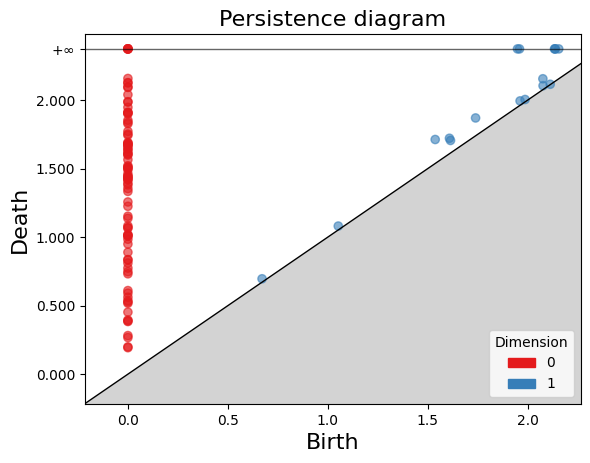

In [101]:
import gudhi as gd
distance_matrix = df_dist.values

rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=2.2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
simplex_tree.compute_persistence()

# Filtrado opcional para ver los ciclos no triviales
diag = simplex_tree.persistence()
for dim, (birth, death) in diag:
    print(f"Dim {dim}: nace en {birth}, muere en {death}")
gd.plot_persistence_diagram(diag)

<Axes: title={'center': 'Persistence barcode'}>

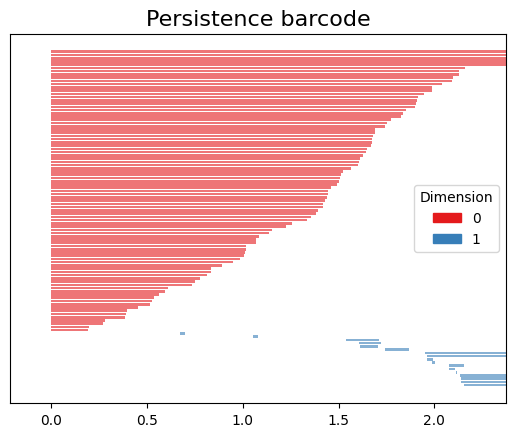

In [109]:
gd.plot_persistence_barcode(diag)


In [102]:
betti = simplex_tree.betti_numbers()
print("Betti numbers:", betti)  # Betti_0, Betti_1, Betti_2

Betti numbers: [5, 6, 0]


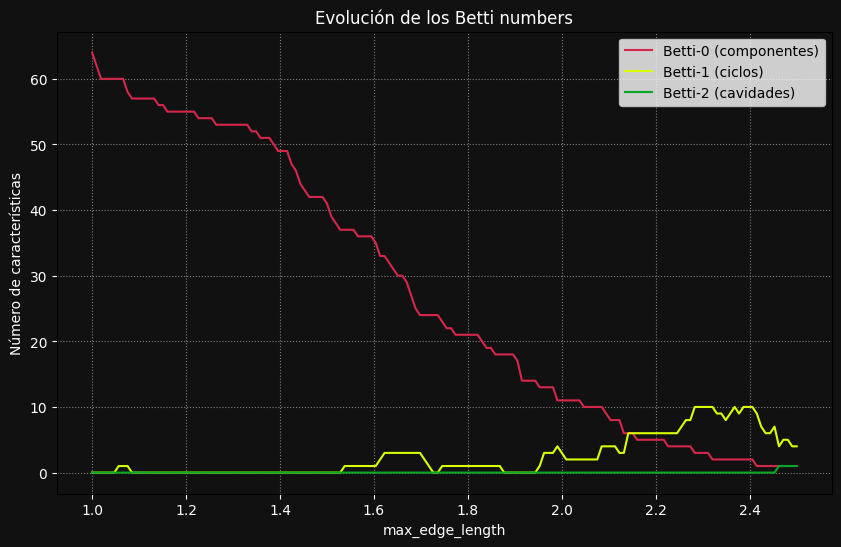

In [114]:

edge_lengths = np.linspace(1, 2.5, 160)
betti_0, betti_1, betti_2 = [], [], []

for length in edge_lengths:
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    simplex_tree.compute_persistence()
    bettis = simplex_tree.betti_numbers()
    while len(bettis) < 3:
        bettis.append(0)
    betti_0.append(bettis[0])
    betti_1.append(bettis[1])
    betti_2.append(bettis[2])

# Estilo tipo Plotly oscuro
plt.figure(figsize=(10, 6))
plt.plot(edge_lengths, betti_0, label='Betti-0 (componentes)', color="#d5274a")
plt.plot(edge_lengths, betti_1, label='Betti-1 (ciclos)', color="#d9ff00")
plt.plot(edge_lengths, betti_2, label='Betti-2 (cavidades)', color="#08a725")
plt.xlabel('max_edge_length', color='white')
plt.ylabel('Número de características', color='white')
plt.title('Evolución de los Betti numbers', color='white')
plt.legend()
plt.grid(True, linestyle='dotted', color='gray')
plt.gca().set_facecolor('#111111')
plt.gcf().patch.set_facecolor('#111111')
plt.tick_params(colors='white')
plt.show()